# Importing Dependencies/Required Libraries

In [60]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# 2. Load CSV into a pandas DataFrame
df = pd.read_csv("trend (1).csv")  

print(df.head(10))


   Transaction ID        Date Product Category                 Product Name  \
0           10001  01-01-2024      Electronics                iPhone 14 Pro   
1           10002  02-01-2024  Home Appliances             Dyson V11 Vacuum   
2           10003  03-01-2024         Clothing             Levi's 501 Jeans   
3           10004  04-01-2024            Books            The Da Vinci Code   
4           10005  05-01-2024  Beauty Products      Neutrogena Skincare Set   
5           10006  06-01-2024           Sports  Wilson Evolution Basketball   
6           10007  07-01-2024      Electronics          MacBook Pro 16-inch   
7           10008  08-01-2024  Home Appliances         Blueair Classic 480i   
8           10009  09-01-2024         Clothing             Nike Air Force 1   
9           10010  10-01-2024            Books        Dune by Frank Herbert   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America  

# Creating & Connecting SQLite Database

In [69]:
conn = sqlite3.connect('sales_data.db') 

In [73]:
df.to_sql("sales", conn, if_exists="replace", index=False) #inserting dataframe into SQLite database
print("\nData inserted into 'sales' table.")


Data inserted into 'sales' table.


In [75]:

query = """
SELECT 
    [Product Name] AS product,
    SUM([Units Sold]) AS total_units,
    SUM([Total Revenue]) AS total_revenue
FROM sales
GROUP BY [Product Name]
"""

summary_df = pd.read_sql_query(query, conn)

# Show result
print("\nSales Summary by Product:\n")
print(summary_df)



Sales Summary by Product:

                                               product  total_units  \
0                                1984 by George Orwell            4   
1                              Adidas 3-Stripes Shorts            5   
2                         Adidas Essential Track Pants            3   
3                       Adidas FIFA World Cup Football            3   
4                  Adidas Originals Superstar Sneakers            4   
..                                                 ...          ...   
227           Yeti Tundra Haul Portable Wheeled Cooler            1   
228  Youth to the People Superfood Antioxidant Clea...            1   
229                                  Zara Summer Dress            3   
230                                      iPhone 14 Pro            2   
231                               iRobot Braava Jet M6            1   

     total_revenue  
0            79.96  
1           149.95  
2           134.97  
3            89.97  
4           31

In [77]:
query = """
SELECT 
    [Product Name] AS product,
    SUM([Units Sold]) AS total_units,
    SUM([Total Revenue]) AS total_revenue
FROM sales
GROUP BY [Product Name]
ORDER BY total_revenue DESC
LIMIT 10
"""

summary_df = pd.read_sql_query(query, conn)

# Show result
print("\nTop 10 Products by Revenue:\n")
print(summary_df)



Top 10 Products by Revenue:

                             product  total_units  total_revenue
0                Canon EOS R5 Camera            1        3899.99
1                         LG OLED TV            2        2599.98
2                MacBook Pro 16-inch            1        2499.99
3          Apple MacBook Pro 16-inch            1        2399.00
4                      iPhone 14 Pro            2        1999.98
5                       Peloton Bike            1        1895.00
6             HP Spectre x360 Laptop            1        1599.99
7                         Roomba i7+            2        1599.98
8              Garmin Forerunner 945            3        1599.97
9  Samsung Odyssey G9 Gaming Monitor            1        1499.99


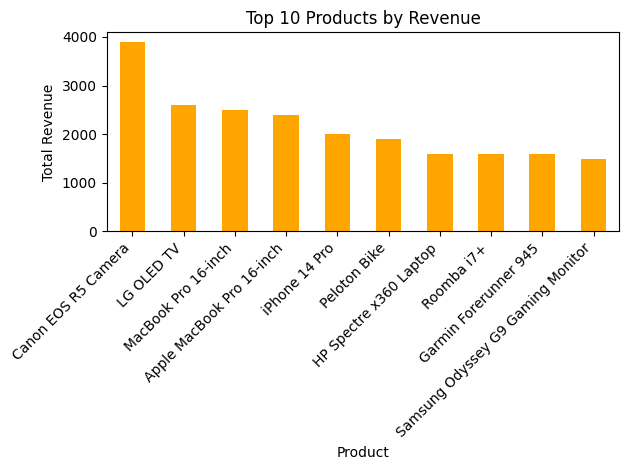

In [79]:
summary_df.plot(kind='bar', x='product', y='total_revenue', color='orange', legend=False)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_10_products_revenue.png")
plt.show()

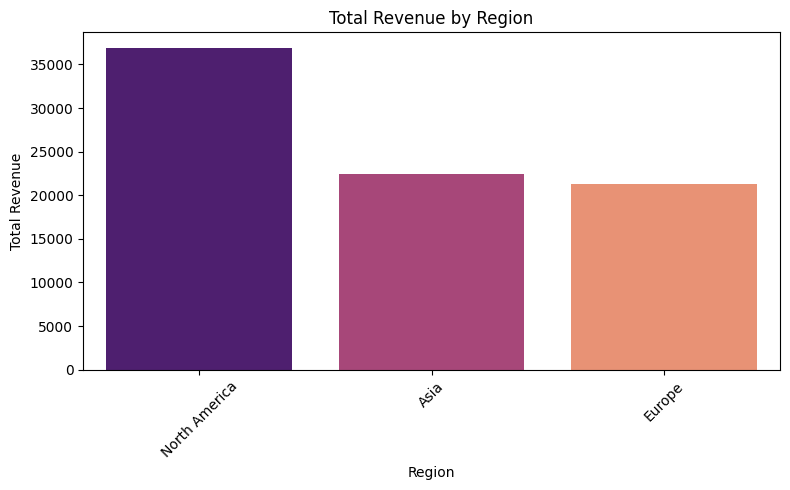

In [81]:
#Sales Revenue by Region
import warnings
warnings.filterwarnings("ignore")
region_sales = (
    df.groupby("Region")["Total Revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x="Region", y="Total Revenue", palette="magma")
plt.title("Total Revenue by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Closing The Connection

In [84]:
# conn.close()